In [ ]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy 
import scipy.stats as ss

In [ ]:
# Reading Given Dataset "ch00_B0833-45_20150612_191438_011_1.txt"
df = pd.read_csv('/content/ch00_B0833-45_20150612_191438_011_1.txt', delim_whitespace=True, header=None,names=["North_A", "South_A"])

volt=df.copy(deep=False) #Creating copy of given dataset
rows = volt.shape[0]
cols = volt.shape[1]
#print(volt.head(5))
volt.describe()

,North_A,South_A
count,3.299994e+07,3.299994e+07
mean,3.484731e+00,7.750941e-01
std,2.803035e+01,2.991954e+01
min,-1.280000e+02,-1.280000e+02
25%,-1.600000e+01,-2.000000e+01
50%,4.000000e+00,1.000000e+00
75%,2.300000e+01,2.100000e+01
max,1.270000e+02,1.270000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32999936 entries, 0 to 32999935
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   North_A  int64
 1   South_A  int64
dtypes: int64(2)
memory usage: 503.5 MB


In [ ]:
# Frequency and time binning parameters
Nf = pow(2,9) # Number of frequency bins; Choose a power of 2: 2^n (E.g., 64, 128, 256)
print('Chosen number of frequency bins = {0}'.format(Nf))
fmax = 16.5e6 # Equals the bandwidth upper-limit of 16.5 MHz
print('Total bandwidth of signal = {0:.1f} MHz'.format(fmax/1e6))
dt = 1/(33e6) # Time resolution of 1/(33 MHz) seconds
print('Time-resolution of voltage sampling = {0:.2f} nanosecond'.format(dt*1e9))

Chosen number of frequency bins = 512
Total bandwidth of signal = 16.5 MHz
Time-resolution of voltage sampling = 30.30 nanosecond


In [ ]:
# For chosen frequency resolution,
print('----------FFT length-----------') # FFT - Fast Fourier Transform
df = fmax/Nf # Lowest frequency probed is equal to the chosen frequency resolution (Bandwidth by number of frequency bins)
print('Lowest frequency probed = {0:.2f} kHz'.format(df/1000))
Tmax = 1/df # Largest time-scale of variability probed is the inverse of the lowest frequency of interest
print('Largest time-scale of variability = {0:.2f} microseconds'.format(Tmax*1e6))
Nfft = 512 #512 # Number of voltage samples to obtain FFT is the number of voltage samples that span the largest time-scale (of interest / probed)
print('Number of voltage samples to obtain FFT = ', Nfft)
#print('Number of voltage samples to obtain FFT = {0:d}'.format(Nfft))
Nspectra = Nfft//2 # The spectral time series has a factor of 'Nfft' less time bins than the voltage data
print('Number of spectra obtained through the {0}-point FFT = {1}'.format(Nfft, Nspectra))
print('Time-resolution of the spectral series = {0:.2f} microsecond'.format(Nfft*dt*1e6))

----------FFT length-----------
Lowest frequency probed = 32.23 kHz
Largest time-scale of variability = 31.03 microseconds
Number of voltage samples to obtain FFT =  512
Number of spectra obtained through the 512-point FFT = 256
Time-resolution of the spectral series = 15.52 microsecond


In [ ]:
print('----------Time rebinning-----------')
Nint = 60 # Choose the number of consecutive spectral samples to be added
print('Number of spectra to add = {0}'.format(Nint))
print('Time-resolution of the co-added time series = {0} micro-second'.format(Nint*Nfft*dt*1e6))
print("Binned time-series has resolution > 1 ms. Choose a smaller number of spectra to average.") if (Nint*Nfft*dt*1e6 > 1000) else print("Binned time-series has resolution <= 1 ms")

----------Time rebinning-----------
Number of spectra to add = 60
Time-resolution of the co-added time series = 930.909090909091 micro-second
Binned time-series has resolution <= 1 ms


# Reshare the voltage time-series to prepare it for taking the N-point Fourier transform

In [ ]:
#----------------------------------------------------------------
volt['North_A']=volt['North_A']-np.mean(volt['North_A'])
volt['South_A']=volt['South_A']-np.mean(volt['South_A'])

volt_all=volt['North_A']+volt['South_A']

In [ ]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))
part=rows//Nf
t1=list(split(volt_all, part))

In [ ]:
temp=np.array(t1)
temp.shape

(64453, 512)

In [ ]:
#display(pd.DataFrame(temp))
#print(temp)
#temp[0]

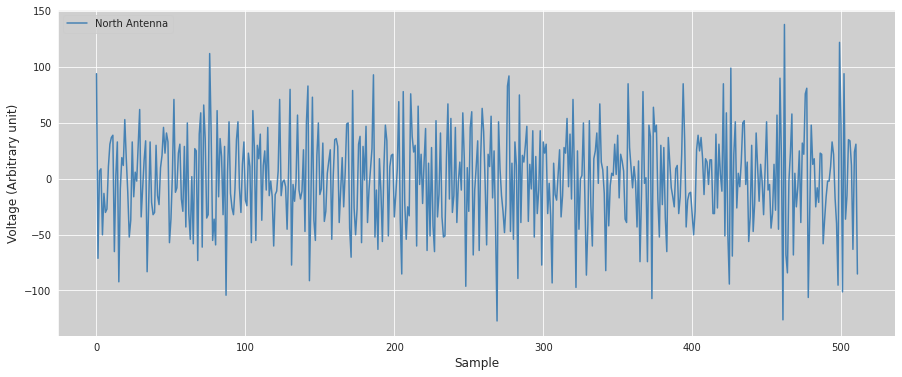

In [ ]:
# Voltage Time series for sample-1
sns.set_style("darkgrid", {"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
plt.plot(temp[0], color='steelblue', label='North Antenna')
plt.ylabel("Voltage (Arbitrary unit)",fontsize=12)
plt.xlabel("Sample",fontsize=12)
plt.legend(loc='best')
plt.show()

# **The Fourier Transform**

In [ ]:
fft=np.fft.rfft(temp)
#list(fft)
# or

"""
l=[]
fft=[]
for i in temp:
  l=np.fft.rfft(i)
  fft.append(l)
fft=np.array(fft)
fft.shape
"""

'\nl=[]\nfft=[]\nfor i in temp:\n  l=np.fft.rfft(i)\n  fft.append(l)\nfft=np.array(fft)\nfft.shape\n'

In [ ]:
fft.shape

(64453, 257)

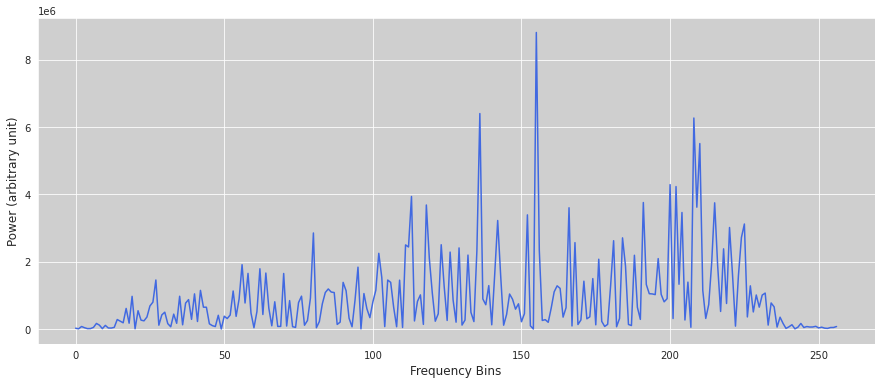

In [ ]:
fourier_transform = fft[0]
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum = np.square(abs_fourier_transform)

#Plot
plt.figure(figsize=(15,6))
plt.plot(power_spectrum,color='royalblue')
plt.ylabel("Power (arbitrary unit)",fontsize=12)
plt.xlabel("Frequency Bins",fontsize=12)
plt.show()

# Calculate the absolute value squared for the FFT output to obtain the power spectral density

In [ ]:
"""
#The list of frequencies can be obtained using the np.fft.rfftfreq method
n=temp.shape[1]
freq = np.fft.rfftfreq(n, d=1./Nf)
"""
#------------------------------------------------------------------------

"""
pow_sp_tmp=[]
pow_sp=[]
for i in fft:
  pow_sp_tmp=np.square(np.abs(i))
  pow_sp.append(pow_sp_tmp)
"""
# or

pow_sp=np.square(np.abs(fft))

#display(pow_sp)

#plt.figure(figsize=(15,6))
#plt.plot(pow_sp)
#plt.show()

In [ ]:
pow_sp.shape

(64453, 257)

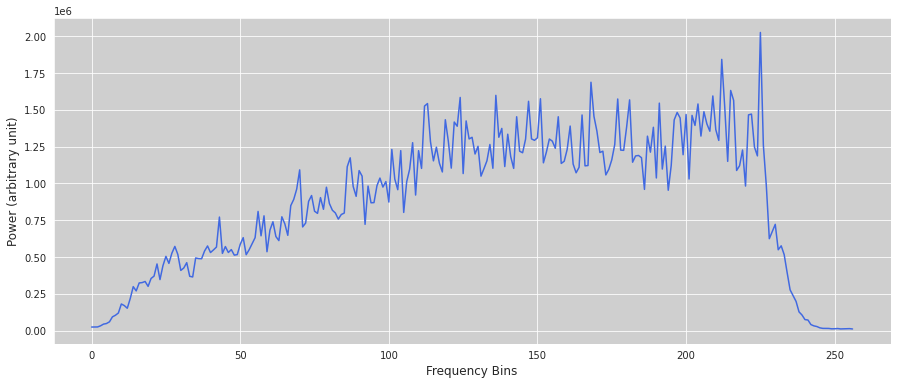

In [ ]:
#Single Average Spectra
rou=np.mean(pow_sp[0:60],axis=0)
plt.figure(figsize=(15,6))
plt.plot(rou,color='royalblue')
plt.ylabel("Power (arbitrary unit)",fontsize=12)
plt.xlabel("Frequency Bins",fontsize=12)
plt.show()

# Add N-set of consecutive spectra to obtain the final dynamic spectrum

In [ ]:
t=[]
new_pow_sp=[]
part=pow_sp.shape[0]//60
b=0
for i in range(part):
    l=np.mean(pow_sp[b:b+60],axis=0)
    new_pow_sp.append(l)
    b=b+60

new_pow_sp=np.array(new_pow_sp)
new_pow_sp.shape

(1074, 257)

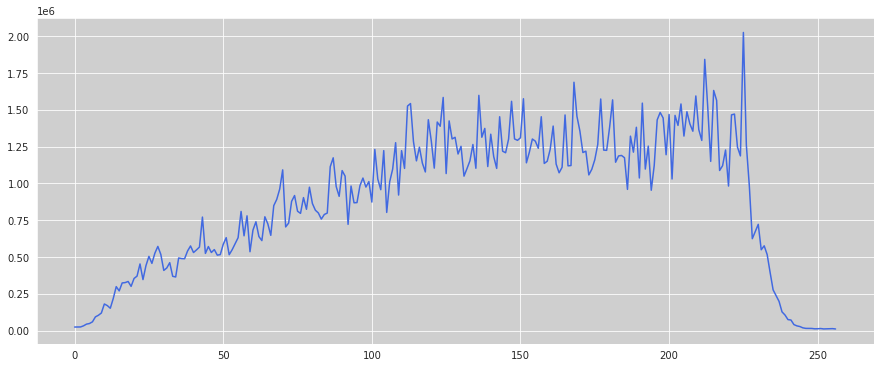

"\nplt.figure(figsize=(15,6))\nplt.plot(new_pow_sp[3],color='royalblue')\nplt.show()\n"

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(new_pow_sp[0],color='royalblue')
plt.show()
"""
plt.figure(figsize=(15,6))
plt.plot(new_pow_sp[3],color='royalblue')
plt.show()
"""

In [ ]:
"""
plt.figure(figsize=(15,6))
plt.plot(new_pow_sp,color='royalblue')
plt.show()
"""

"\nplt.figure(figsize=(15,6))\nplt.plot(new_pow_sp,color='royalblue')\nplt.show()\n"

In [ ]:
#Average Spectra
avg_pow_sp=np.mean(new_pow_sp,axis=0)
avg_pow_sp.shape

(257,)

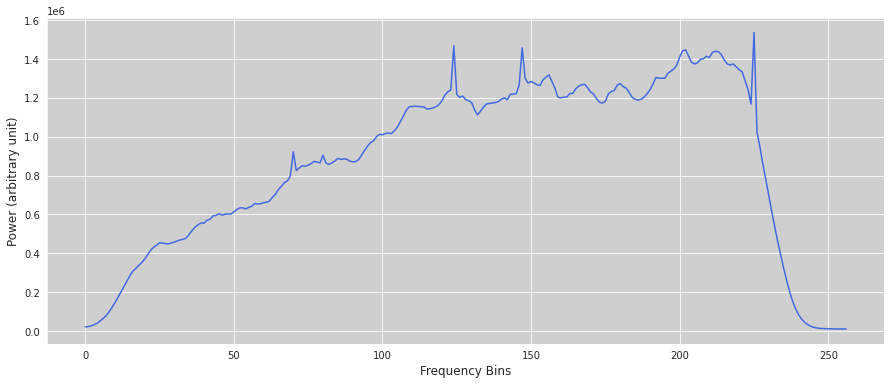

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(avg_pow_sp,color='royalblue')
plt.ylabel("Power (arbitrary unit)",fontsize=12)
plt.xlabel("Frequency Bins",fontsize=12)
plt.show()

# **The Dynamic Spectrum**

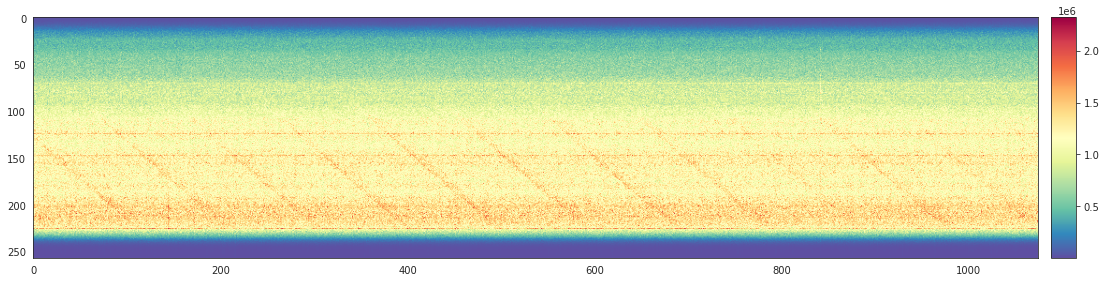

In [ ]:
# The dynamic spectrum--------------------------------------------------------
sns.set_style("white")
fig=plt.figure(figsize=(18,6))
ax = plt.axes()
orig_map=plt.cm.get_cmap('Spectral')
reversed_map = orig_map.reversed()
im=ax.imshow(new_pow_sp.T, cmap=reversed_map)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
fig.colorbar(im, cax=cax) 
plt.show()

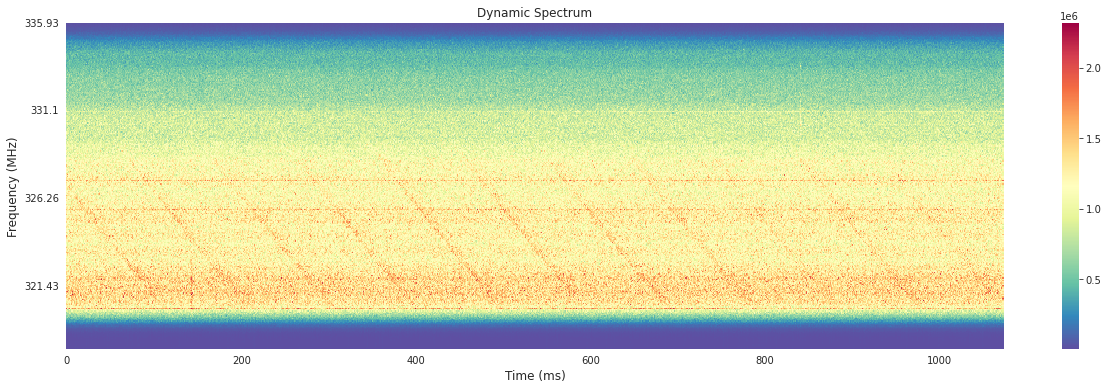

In [ ]:
dynamic=pd.DataFrame(new_pow_sp.T)
dynamic.index=np.round(np.arange(318,336,0.07003891051),2)[::-1]
#display(dynamic)


fig=plt.figure(figsize=(21,6))
orig_map=plt.cm.get_cmap('Spectral')
reversed_map = orig_map.reversed()
sns.heatmap(dynamic, cmap=reversed_map, xticklabels=200, yticklabels=69)
plt.yticks(rotation=0)
plt.xlabel("Time (ms)",fontsize=12)
plt.title("Dynamic Spectrum")
plt.ylabel("Frequency (MHz)",fontsize=12)
plt.show()

In [ ]:
dynamic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073
335.93,24087.668908,18238.467895,23966.024179,17951.793105,21143.539980,16034.417671,20007.545272,21548.631429,25193.126353,23366.784367,25890.499111,17751.626480,16169.942068,15687.587284,15686.490587,27900.468937,21034.214968,23036.060672,26997.530772,28236.413439,16260.360329,24581.649189,20509.185440,24904.909550,26751.581150,21561.023178,33383.309377,17714.767450,21933.212925,20241.789315,19903.514912,23030.490274,18616.020331,21942.638206,16402.478660,34767.428669,15729.996536,29607.633146,24405.051406,30970.359499,...,21171.909022,31105.245442,19569.087698,23583.208591,17943.859815,25937.385353,24733.654681,17495.009621,21903.675787,15199.812996,29525.760957,19548.619887,23586.978490,24690.293505,15939.728511,23643.151048,19657.918001,15274.122189,27530.236976,25549.324022,17960.303415,23027.611809,18227.063033,15858.259342,23565.192660,17842.338350,21812.845185,15508.324965,27828.263875,29038.906275,29374.202229,19580.151678,14436.642869,26270.388071,18216.645585,22825.565590,22747.095536,22224.209907,19262.733217,28618.348103
335.86,24719.359564,20205.920918,20077.211415,21710.761429,26126.371933,23724.099720,26689.562932,15293.887881,20513.862540,25760.883538,29635.058373,21005.731509,27005.929847,25474.438591,23954.093501,24943.381375,23125.781030,20170.370051,20958.346025,23013.187826,20860.306336,22561.089968,20676.916986,20373.167824,27172.685925,18816.472402,24605.458092,25896.697910,31847.651347,27139.349602,21442.279247,24505.838206,23261.087594,28202.553133,23461.712411,25648.971824,19885.246408,24181.612291,25270.172649,27122.060314,...,24643.458839,29935.419235,22222.730321,22556.324720,24090.166829,22025.994666,23194.293744,24931.574608,27643.377634,24562.157904,24666.513137,23350.070183,23267.159455,26509.817319,22840.514209,31711.056118,25687.812589,20322.855746,25990.133483,33012.393707,24952.735475,21418.153519,30036.093856,23818.451583,20023.854193,22745.465432,25229.720553,20535.918367,26784.177570,17865.884853,26025.198131,19271.431703,25336.100172,19231.164680,24694.647135,25592.699705,26253.017193,21199.947044,24843.242011,27423.155355
335.79,24697.430347,22850.563223,23213.994167,22091.529505,26820.152179,28486.247568,32599.521626,24324.834553,28578.000588,24501.696084,38878.629997,22089.959163,30195.716961,25787.985666,25540.867138,25358.131273,26024.611669,26381.639696,20854.759897,32112.413043,23140.601358,31518.490946,29022.893065,24523.277059,29456.855879,28070.909963,23879.957353,26274.772188,26818.370932,29045.603986,26010.034479,29487.266175,21772.257262,28206.431652,23947.406697,25855.385886,26704.913613,27517.734175,34399.251830,25903.998279,...,30478.656436,26046.377881,31019.618669,24865.877359,29386.858474,27814.916932,27372.378834,26171.800629,33616.704239,28486.681787,21285.072340,27896.925010,27407.927251,30037.547117,23271.796397,28091.909991,27187.403214,30354.892366,26394.166808,35914.236803,23449.317402,22280.010593,26273.445675,29706.041924,23997.157851,17745.541633,25348.284598,27041.633061,22640.229033,25546.366014,30108.720624,29399.545865,26501.165281,26070.852394,26620.186278,25513.199686,31375.178987,32565.288990,22632.668236,24040.344418
335.72,32357.700497,35969.465315,26700.243179,33706.901493,31124.995441,32603.119987,30904.527534,34725.102491,31423.917700,32405.784325,31297.909333,37813.317541,30265.531561,34577.857296,29391.910041,29137.296626,29936.274077,35485.093314,33161.835820,37749.455955,32808.205358,30749.796715,31672.131376,33480.422262,39833.751532,34257.227645,28420.328751,38193.368515,27920.202263,31242.983443,25608.659523,31069.954349,25234.034365,30791.384927,34161.057166,34658.557343,30813.643580,35069.405640,37338.971291,36808.769391,...,3

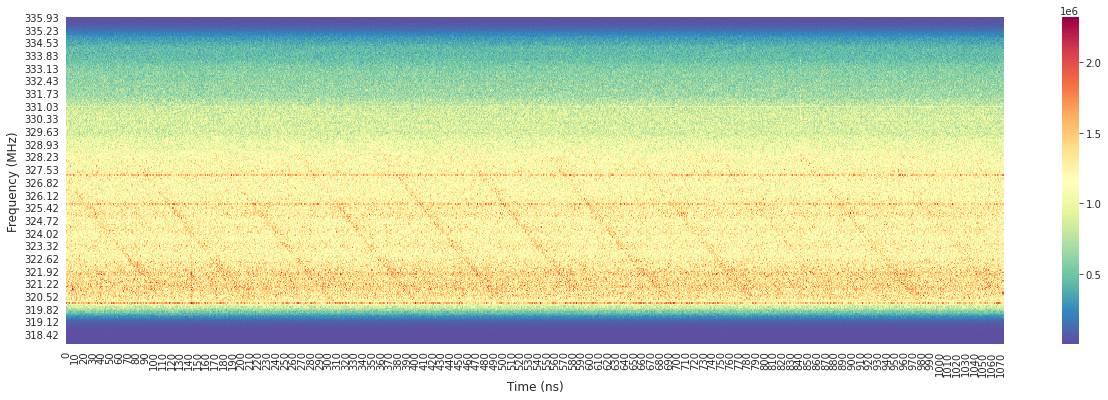

In [ ]:
# For Observing more accurately---------------------------------------
fig=plt.figure(figsize=(21,6))
orig_map=plt.cm.get_cmap('Spectral')
reversed_map = orig_map.reversed()
sns.heatmap(dynamic, cmap=reversed_map, xticklabels=10, yticklabels=10)
plt.xlabel("Time (ns)",fontsize=12)
plt.ylabel("Frequency (MHz)",fontsize=12)
plt.yticks(rotation=0) 
plt.show()

In [ ]:
# For De-Dispersion Spectrum------------------------------------
bin=np.arange(0,257,1,dtype='int64')
freq=np.round(np.arange(318,336,0.07003891051),2)[::-1]
temp_idx=pd.DataFrame([])
temp_idx['Freq']=freq
print(temp_idx[temp_idx['Freq']==328.58].index.values,temp_idx[temp_idx['Freq']==320.17].index.values)

[105] [225]


In [ ]:
# Dispersion Measure------------
DM=((100*pow(10,-9))/(4.149*pow(10,3)))*pow((1/pow(328.58*pow(10,3),2))-(1/pow(322.25*pow(10,3),2)),-1)
DM

-65.5923807249108

In [ ]:
# For de dispersion
u=[]
for i,j in zip(bin[106:226],freq[106:226]):  #referece is freq[105] = 328.58 MHz
  t=(4.149*pow(10,3)*(DM)*pow(j,-2))
  b=int((t*pow(10,6))//930.90)
  u.append(b)
  dynamic.iloc[i]=np.roll(dynamic.iloc[i],b)
print(dynamic.shape)

(257, 1074)


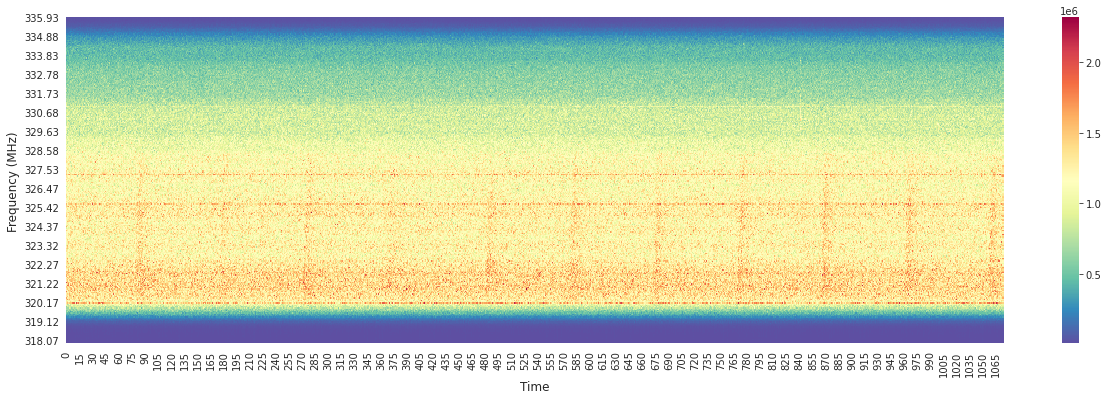

In [ ]:
fig=plt.figure(figsize=(21,6))
orig_map=plt.cm.get_cmap('Spectral')
reversed_map = orig_map.reversed()
sns.heatmap(dynamic, cmap=reversed_map, xticklabels=15, yticklabels=15)
plt.yticks(rotation=0)
plt.xlabel("Time",fontsize=12)
plt.ylabel("Frequency (MHz)",fontsize=12)
plt.show()

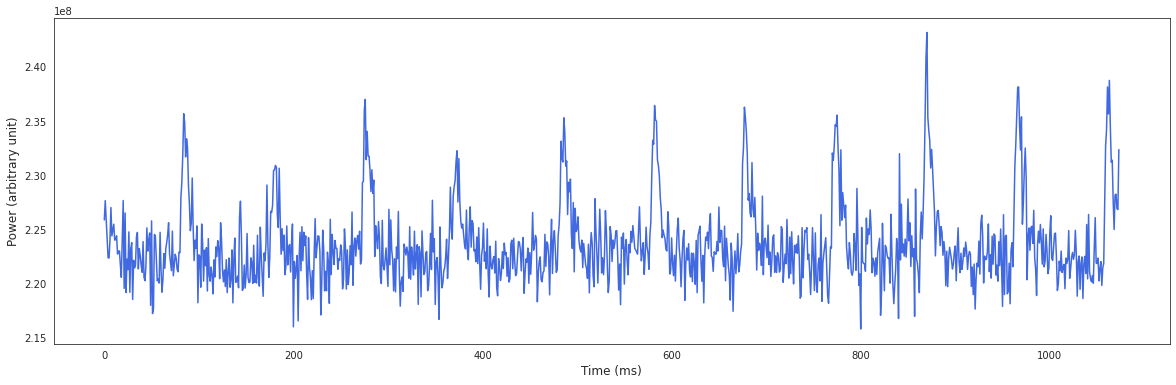

In [ ]:
avg=np.sum(dynamic,axis=0)
plt.figure(figsize=(20,6))
plt.plot(avg,color='royalblue')
plt.ylabel("Power (arbitrary unit)",fontsize=12)
plt.xlabel("Time (ms)",fontsize=12)
plt.show()

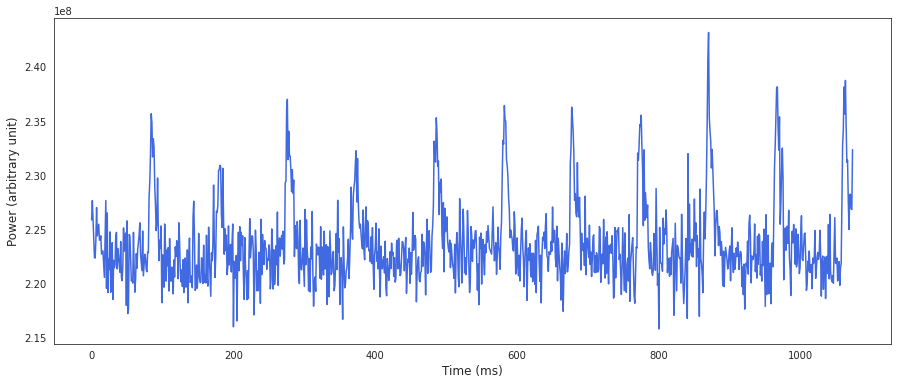

In [ ]:
avg=np.sum(dynamic,axis=0)
plt.figure(figsize=(15,6))
plt.plot(avg,color='royalblue')
plt.ylabel("Power (arbitrary unit)",fontsize=12)
plt.xlabel("Time (ms)",fontsize=12)
plt.show()